### Overview
This is a performance analysis of a portfolio consisting of QQQ and SPY ETFs. The analysis includes the calculation of various performance metrics such as Sharpe ratio, Sortino ratio, and Calmar ratio to evaluate the risk-adjusted returns of the portfolio. In this notebook, there will be a composition of the portfolio based on the optimal weights derived from the performance metrics.

### Objectives
1. Calculate the Sharpe ratio, Sortino ratio, Calmar ratio, 1Y Rolling Return, CAGR and How long the recovery times for QQQ and SPY.
2. Analyze the performance of the portfolio based on these ratios.
3. Make a recommendation on the optimal portfolio composition based on the analysis.


In [1]:
import pandas as pd
import numpy as np

In [2]:
daily_return_df = pd.read_csv('../data/daily_return_data.csv')
df = pd.read_csv('../data/full_data.csv')

In [3]:
daily_return_df

,QQQ,SPY
0,NaN,NaN
1,-0.014669,-0.018059
2,-0.013409,-0.009419
3,0.012891,0.012461
4,0.019140,0.017745
...,...,...
2646,0.003627,0.001908
2647,0.000917,-0.004273
2648,0.001024,0.003343
2649,0.008093,0.006120


In [4]:
df

,Date,Ticker,Price,Return,Cumulative Return,Running Max,Drawdown
0,2015-01-02,QQQ,95.016594,NaN,NaN,NaN,NaN
1,2015-01-05,QQQ,93.622818,-0.014669,0.985331,0.985331,0.000000
2,2015-01-06,QQQ,92.367470,-0.013409,0.972119,0.985331,-0.013409
3,2015-01-07,QQQ,93.558197,0.012891,0.984651,0.985331,-0.000690
4,2015-01-08,QQQ,95.348862,0.019140,1.003497,1.003497,0.000000
...,...,...,...,...,...,...,...
5297,2025-07-14,SPY,624.809998,0.001908,3.641762,3.647649,-0.001614
5298,2025-07-15,SPY,622.140015,-0.004273,3.626200,3.647649,-0.005880
5299,2025-07-16,SPY,624.219971,0.003343,3.638323,3.647649,-0.002557
5300,2025-07-17,SPY,628.039978,0.006120,3.660588,3.660588,0.000000


### Annualized Returns and Annualized Volatility
The annualized returns and annualized volatility for QQQ and SPY are calculated to understand the risk-return profile of each ETF. The annualized return is computed as the mean daily return multiplied by 252 (the number of trading days in a year), while the annualized volatility is calculated as the standard deviation of daily returns multiplied by the square root of 252.

In [5]:
# Calculating Annualized Return
returns_mean = daily_return_df.mean()
annualized_return = returns_mean * 252
print("Annualized Return:\n", annualized_return)

print("")

# Calculating Annualized Volatility
volatility_mean = daily_return_df.std()
annualized_volatility = volatility_mean * np.sqrt(252)
print("Annualized Volatility:\n", volatility_mean)

Annualized Return:
 QQQ    0.193699
SPY    0.139644
dtype: float64

Annualized Volatility:
 QQQ    0.014002
SPY    0.011355
dtype: float64


### Sharpe Ratio
The Sharpe ratio is a measure of risk-adjusted return, calculated as the excess return of the portfolio over the risk-free rate divided by the standard deviation of the portfolio returns. A higher Sharpe ratio indicates better risk-adjusted performance.

In [40]:
from pandas_datareader import data as pdr
import datetime

start = datetime.datetime(2015, 1, 1)
end = datetime.datetime(2025, 7, 23)

# Get 10Y Treasury Yield Data
rf = pdr.DataReader('DGS10', 'fred', start, end)

# Handle missing value
rf.dropna(inplace=True)

# Convert from percent to decimal
rf = rf / 100

# Get the average Risk Free Rate
rf_mean = rf['DGS10'].mean()

print("Average Risk-Free Rate:", rf_mean)

Average Risk-Free Rate: 0.02581003787878788


In [41]:
# Calculate the Sharpe Ratio
sharpe_ratio = (annualized_return - rf_mean) / annualized_volatility
print("Sharpe Ratio:\n", sharpe_ratio)

Sharpe Ratio:
 QQQ    0.755321
SPY    0.631494
dtype: float64


### Sortino Ratio
The Sortino ratio is similar to the Sharpe ratio but focuses only on downside risk. It is calculated as the excess return of the portfolio over the risk-free rate divided by the standard deviation of negative returns. This ratio provides a better measure of risk-adjusted performance when considering only the downside volatility.

In [42]:
# Calculate downside deviation (daily)
downside_returns = daily_return_df.copy()
downside_returns[downside_returns > 0] = 0  # keep only negative returns

downside_deviation = downside_returns.std()  # standard deviation of negative returns

# Annualize downside deviation
annualized_downside_deviation = downside_deviation * np.sqrt(252)

# Calculate Sortino Ratio
sortino_ratio = (annualized_return - rf_mean) / annualized_downside_deviation
print("Sortino Ratio:\n", sortino_ratio)

Sortino Ratio:
 QQQ    1.199553
SPY    0.981066
dtype: float64


In [43]:
# Create a wide DataFrame version
df_wide = df.pivot(index='Date', columns='Ticker')

# Flatten MultiIndex Column
df_wide.columns = ['_'.join(col).strip() for col in df_wide.columns.values]

# Change Date into datetime format
df_wide.index = pd.to_datetime(df_wide.index)

# Sort by date
df_wide = df_wide.sort_index()

df_wide

,Price_QQQ,Price_SPY,Return_QQQ,Return_SPY,Cumulative Return_QQQ,Cumulative Return_SPY,Running Max_QQQ,Running Max_SPY,Drawdown_QQQ,Drawdown_SPY
Date,,,,,,,,,,
2015-01-02,95.016594,171.568039,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-05,93.622818,168.469620,-0.014669,-0.018059,0.985331,0.981941,0.985331,0.981941,0.000000,0.000000
2015-01-06,92.367470,166.882751,-0.013409,-0.009419,0.972119,0.972691,0.985331,0.981941,-0.013409,-0.009419
2015-01-07,93.558197,168.962326,0.012891,0.012461,0.984651,0.984812,0.985331,0.984812,-0.000690,0.000000
2015-01-08,95.348862,171.960526,0.019140,0.017745,1.003497,1.002288,1.003497,1.002288,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
2025-07-14,556.210022,624.809998,0.003627,0.001908,5.853820,3.641762,5.854241,3.647649,-0.000072,-0.001614
2025-07-15,556.719971,622.140015,0.000917,-0.004273,5.859187,3.626200,5.859187,3.647649,0.000000,-0.005880
2025-07-16,557.289978,624.219971,0.001024,0.003343,5.865186,3.638323,5.865186,3.647649,0.000000,-0.002557


### CAGR (Compound Annual Growth Rate)
CAGR is a useful measure to understand the average annual growth rate of an investment over a specified time period, assuming the investment has grown at a steady rate. It is calculated as the ending value divided by the beginning value raised to the power of one divided by the number of years, minus one.

In [44]:
# CAGR (Compound Annual Growth Rate) Function
def calculate_cagr(price_series) -> int:
    start_value = price_series.iloc[1]
    end_value = price_series.iloc[-1]
    num_days = (price_series.index[-1] - price_series.index[1]).days
    num_years = num_days / 365.25

    cagr = (end_value - start_value) ** (1 / num_years) - 1
    return cagr

# Calculate CAGR for SPY and QQQ
cagr_spy = calculate_cagr(df_wide['Cumulative Return_SPY'])
cagr_qqq = calculate_cagr(df_wide['Cumulative Return_QQQ'])

print("SPY CAGR:", cagr_spy)
print("QQQ CAGR:", cagr_qqq)

SPY CAGR: 0.09796065970606649
QQQ CAGR: 0.16335357888261215


### Rolling Returns
Rolling returns are calculated to understand the performance of the portfolio over different time periods. The 1Y rolling return is computed as the percentage change in the portfolio value over a rolling window of one year.

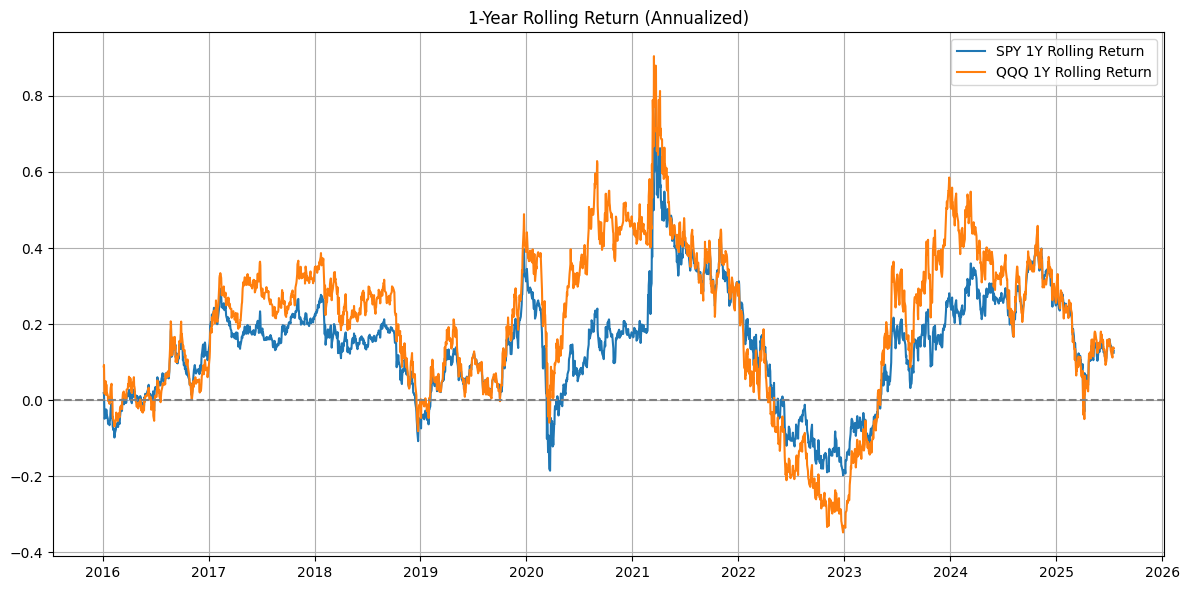

In [45]:
# Rolling Return Function
def calculate_rolling_return(price_series, window=252):
    rolling_return = (price_series / price_series.shift(window)) ** (1 / (window / 252)) - 1
    return rolling_return

# Calculate Rolling Return for SPY and QQQ
df_wide['Rolling_Return_SPY'] = calculate_rolling_return(df_wide['Cumulative Return_SPY'])
df_wide['Rolling_Return_QQQ']= calculate_rolling_return(df_wide['Cumulative Return_QQQ'])

# Visualize the data
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df_wide.index, df_wide['Rolling_Return_SPY'], label='SPY 1Y Rolling Return')
plt.plot(df_wide.index, df_wide['Rolling_Return_QQQ'], label='QQQ 1Y Rolling Return')
plt.axhline(0, color='gray', linestyle='--')
plt.title('1-Year Rolling Return (Annualized)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('../output/visualizations/1Y_rolling_return.png')
plt.show()

### Recovery Time
The recovery time is the duration it takes for an investment to recover from a drawdown. It is calculated as the number of days it takes for the portfolio to return to its previous peak value after a decline. This metric helps in understanding the resilience of the portfolio during market downturns.

In [46]:
df_cumulative = df_wide[['Cumulative Return_SPY', 'Cumulative Return_QQQ']].copy()
df_cumulative.index = pd.to_datetime(df_cumulative.index)

# Recovery Time Function
def get_recovery_periods(cum_return_series):
    high_watermark = cum_return_series.cummax()
    in_drawdown_flags = cum_return_series < high_watermark

    recovery_periods = []
    in_drawdown = False
    start_date = None

    for date, value in cum_return_series.items():
        if not in_drawdown and in_drawdown_flags.loc[date]:
            in_drawdown = True
            start_date = date
        elif in_drawdown and not in_drawdown_flags.loc[date]:
            end_date = date
            duration = (end_date - start_date).days
            recovery_periods.append({
                'start': start_date,
                'end': end_date,
                'recovery_days': duration
            })
            in_drawdown = False
            start_date = None

    return pd.DataFrame(recovery_periods)

# Apply to SPY and QQQ
spy_recovery = get_recovery_periods(df_cumulative['Cumulative Return_SPY'])
qqq_recovery = get_recovery_periods(df_cumulative['Cumulative Return_QQQ'])


# Create a Summary DataFrame
summary = pd.DataFrame({
    'ETF': ['SPY', 'QQQ'],
    'Max Recovery Days': [
        spy_recovery['recovery_days'].max(),
        qqq_recovery['recovery_days'].max()
    ],
    'Avg Recovery Days': [
        spy_recovery['recovery_days'].mean(),
        qqq_recovery['recovery_days'].mean()
    ],
    'Total Drawdowns': [
        len(spy_recovery),
        len(qqq_recovery)
    ]
})

print(summary)

   ETF  Max Recovery Days  Avg Recovery Days  Total Drawdowns
0  SPY                708          17.939891              183
1  QQQ                715          21.415584              154


### Calmar Ratio
The Calmar ratio is a measure of risk-adjusted return that compares the annualized return of the portfolio to its maximum drawdown. It is calculated as the annualized return divided by the maximum drawdown. A higher Calmar ratio indicates better performance relative to the risk taken.

In [47]:
# Calculate Max Drawdown
def calculate_max_drawdown(df, col):
    running_max = df[col].cummax()
    drawdown = df[col] / running_max - 1
    max_dd = drawdown.min() 
    return abs(max_dd)

# Calculate Calmar Ratio
def calculate_calmar_ratio(df, col):
    cagr = calculate_cagr(df[col])
    max_dd = calculate_max_drawdown(df, col)
    if max_dd == 0:
        return float('inf')
    calmar = cagr / max_dd
    return calmar

# Apply to QQQ and SPY
qqq_calmar = calculate_calmar_ratio(df_cumulative, 'Cumulative Return_QQQ')
spy_calmar = calculate_calmar_ratio(df_cumulative, 'Cumulative Return_SPY')

print(f"Calmar Ratio QQQ: {qqq_calmar:.4f}")
print(f"Calmar Ratio SPY: {spy_calmar:.4f}")

Calmar Ratio QQQ: 0.4651
Calmar Ratio SPY: 0.2905


### Best Portfolio Composition based on Sharpe, Sortino, and Calmar Ratios


In [14]:
weights = np.arange(0, 1.01, 0.01)
results = []

for w in weights:
    qqq_w = w
    spy_w = 1 - w
    df_wide['Portfolio Return'] = qqq_w * df_wide['Return_QQQ'] + spy_w * df_wide['Return_SPY']

    cumulative = (1 + df_wide['Portfolio Return']).cumprod()
    total_return = cumulative.iloc[-1] - 1
    volatility = df_wide['Portfolio Return'].std() * np.sqrt(252)
    downside_std = df_wide.loc[df_wide['Portfolio Return'] < 0, 'Portfolio Return'].std() * np.sqrt(252)
    max_dd = (cumulative / cumulative.cummax() - 1).min()
    cagr = (cumulative.iloc[-1])**(252/len(df_wide)) - 1

    sharpe = (cagr / volatility) if volatility != 0 else 0
    sortino = (cagr / downside_std) if downside_std != 0 else 0
    calmar = (cagr / abs(max_dd)) if max_dd != 0 else 0

    results.append({
        'QQQ Weight': qqq_w,
        'SPY Weight': spy_w,
        'Sharpe': sharpe,
        'Sortino': sortino,
        'Calmar': calmar,
        'Max_Drawdown' : max_dd
    })

result_df = pd.DataFrame(results)
result_df

,QQQ Weight,SPY Weight,Sharpe,Sortino,Calmar,Max_Drawdown
0,0.00,1.00,0.727842,0.886644,0.389123,-0.337173
1,0.01,0.99,0.729812,0.890068,0.391424,-0.336609
2,0.02,0.98,0.731758,0.892831,0.393732,-0.336045
3,0.03,0.97,0.733682,0.895318,0.396046,-0.335480
4,0.04,0.96,0.735582,0.897903,0.398367,-0.334916
...,...,...,...,...,...,...
96,0.96,0.04,0.826475,1.054495,0.525182,-0.346418
97,0.97,0.03,0.826741,1.055238,0.525050,-0.347456
98,0.98,0.02,0.826997,1.055837,0.524725,-0.348622
99,0.99,0.01,0.827241,1.056500,0.524224,-0.349906


In [17]:
# Normalize the metrics
from sklearn.preprocessing import MinMaxScaler

metrics = result_df[['Sharpe', 'Sortino', 'Calmar', 'Max_Drawdown']].copy()

# Invert Max Drawdown
metrics['Max_Drawdown'] = -metrics['Max_Drawdown']  

scaler = MinMaxScaler()
normalized = scaler.fit_transform(metrics)
result_df[['Sharpe_norm', 'Sortino_norm', 'Calmar_norm', 'Max_Drawdown_norm']] = normalized

In [20]:
result_df['Max_Drawdown_norm'] = 1 - result_df['Max_Drawdown_norm']

result_df['Composite Score'] = (
    0.25 * result_df['Sharpe_norm'] +
    0.25 * result_df['Sortino_norm'] +
    0.25 * result_df['Calmar_norm'] +
    0.25 * result_df['Max_Drawdown_norm']
)

result_df = result_df.sort_values(by='Composite Score', ascending=False)
result_df.head()

,QQQ Weight,SPY Weight,Sharpe,Sortino,Calmar,Max_Drawdown,Sharpe_norm,Sortino_norm,Calmar_norm,Drawdown_norm,Max_Drawdown_norm,Composite Score
57,0.57,0.43,0.805865,1.007228,0.530838,-0.305122,0.783116,0.706907,1.000000,0.000561,0.999439,0.872365
58,0.58,0.42,0.806676,1.008892,0.530678,-0.306201,0.791254,0.716660,0.998867,0.023957,0.976043,0.870706
59,0.59,0.41,0.807471,1.010525,0.530518,-0.307278,0.799226,0.726238,0.997742,0.047331,0.952669,0.868969
60,0.60,0.40,0.808248,1.012525,0.530360,-0.308354,0.807032,0.737960,0.996623,0.070683,0.929317,0.867733
61,0.61,0.39,0.809010,1.014210,0.530202,-0.309430,0.814675,0.747840,0.995511,0.094013,0.905987,0.866003


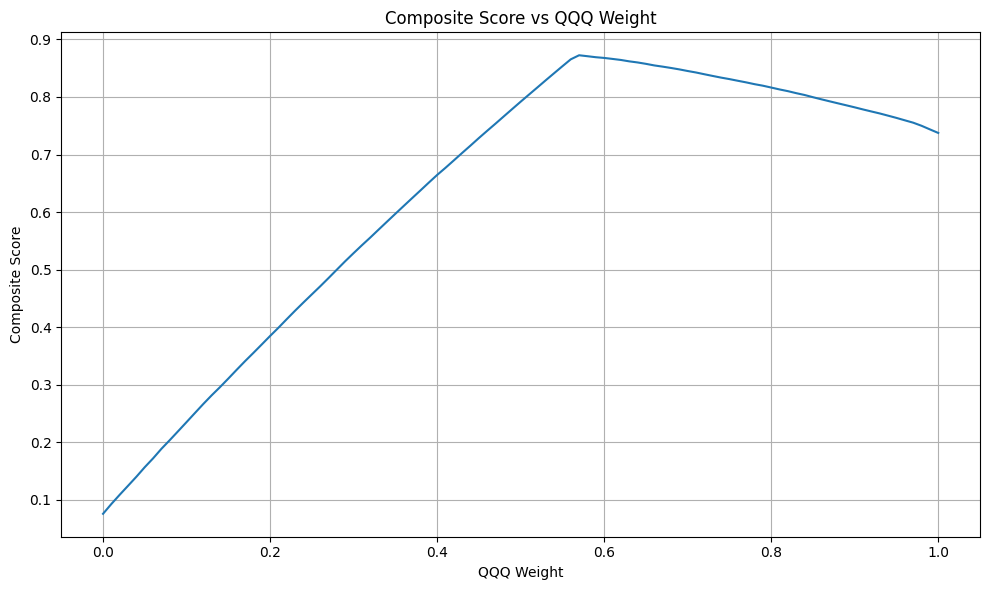

In [31]:
# Visualize the data
import seaborn as sns

plt.figure(figsize=(10,6))
sns.lineplot(x='QQQ Weight', y='Composite Score', data=result_df)
plt.title('Composite Score vs QQQ Weight')
plt.xlabel('QQQ Weight')
plt.ylabel('Composite Score')
plt.grid()
plt.tight_layout()
plt.savefig('../output/visualizations/composite_score_vs_QQQ_weight.png')
plt.show()

### Portfolio Result
Based on the analysis of the Sharpe, Sortino, and Calmar ratios, the optimal portfolio composition is as follows:
- QQQ = 57%
- SPY = 43%
### Portfolio Performance Metrics

In [22]:
# Set Weight
qqq_weight = 0.57
spy_weight = 0.43

# Combined Result
portfolio_returns = qqq_weight * df_wide['Return_QQQ'] + spy_weight * df_wide['Return_SPY']

# Calculate portfolio value over time
portfolio_value = (1 + portfolio_returns).cumprod()

In [23]:
# Calculate number of years
total_days = len(portfolio_returns)
years = total_days / 252  # Assuming 252 trading days/year

# Calculate CAGR
ending_value = portfolio_value.iloc[-1]
cagr = (ending_value) ** (1 / years) - 1
print("CAGR:", cagr)

CAGR: 0.16197074143941004


In [24]:
# Calculate running max
running_max = portfolio_value.cummax()

# Drawdown at each time
drawdown = portfolio_value / running_max - 1

# Max drawdown
max_drawdown = drawdown.min()
print("Max Drawdown:", max_drawdown)


Max Drawdown: -0.3051224574450746


In [ ]:
# Portfolio Total Return
total_return = portfolio_value.iloc[-1] - 1
print("Total Return:", total_return)

Total Return: 3.8511318409990976


In [ ]:
# Create a DataFrame from Portfolio Performance
performance = {
    'Weight QQQ': qqq_weight,
    'Weight SPY': spy_weight,
    'CAGR': cagr,
    'Max Drawdown': max_drawdown,
    'Total Return': total_return
}
pd.DataFrame([performance])

,Weight QQQ,Weight SPY,CAGR,Max Drawdown,Total Return
0,0.57,0.43,0.161971,-0.305122,3.851132


### Results
This Portfolio Performance section provides insights into the combined performance of the QQQ and SPY indices based on the optimal weights derived from the Sharpe, Sortino, Calmar, and Maxium Drawdown ratios. The portfolio is constructed with QQQ at 57% and SPY at 43%, reflecting the best risk-adjusted returns.

### Performance Summary
- **CAGR**: 16.2%
- **Maximum Drawdown**: -30.5%
- **Total Return (10 Years)**: 385.1%
- **Sharpe Ratio**: 0.805
- **Sortino Ratio**: 1.007
- **Calmar Ratio**: 0.530

### Advice for Beginner Investors
- **Diversification**: Consider diversifying your portfolio across different asset classes to reduce risk.
- **Risk Tolerance**: Understand your risk tolerance and invest accordingly. The Sharpe and Sortino ratios can help assess the risk-adjusted returns of your investments.
- **Long-Term Perspective**: Focus on long-term performance rather than short-term fluctuations. The CAGR and rolling returns provide insights into the long-term growth potential of your investments.
- **Learn before Investing**: Familiarize yourself with key financial metrics and ratios to make informed investment decisions. The analysis of Sharpe, Sortino, and Calmar ratios can help you evaluate the performance of your portfolio.

### Disclaimer
This analysis is for informational purposes only and **does not constitute financial advice**. Past performance is not indicative of future results. Always do your own research or consult with a financial advisor before making investment decisions.